# Solving ODEs
How to approach solving Ordinary Differential Equations in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### First Order Differential Equations
Let's try and solve a simple first-order ODE of the form
$$
\frac{dy}{dx}+y=x,\quad y(0)=1
$$
which has a closed form solution of 
$$
y=x-1+2e^{-x}\,.
$$

First we import `odeint` from scipy

In [2]:
from scipy.integrate import odeint

Determine how to use `odeint`

Now define the model $\frac{dy}{dx}$:

In [3]:
def dy_dx(y, x):
    return x - y

Finally, establish the domain of the problem, and the initial conditions

In [4]:
x = np.linspace(0, 50, 100)
y0 = 1.0
y = odeint(dy_dx, y0, x).reshape(x.shape)
y_analytic = (x - 1 + 2*np.exp(-x))

Plot the result, and compare against the analytic solution

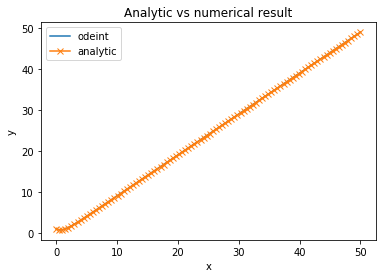

In [5]:
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, label="odeint")
plt.plot(x, y_analytic, label='analytic', marker='x')
plt.title("Analytic vs numerical result")
plt.legend()

Plot the difference of the two solutions

Text(0.5, 1.0, 'Numerical integration error')

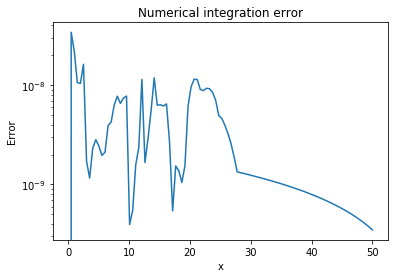

In [6]:
plt.semilogy(x, np.abs(y-y_analytic))
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Numerical integration error")

### Second Order Differential Equations
Consider the second-order damped simple harmonic motion differential equation
$$
y^{\prime\prime}+2y^\prime+2y=\cos(x)\,\quad y(0)=0,\;y^\prime(0)=0\,.
$$
We can transform this into two first-order equations with the introduction of a new variable
$$
z=y^\prime\Rightarrow z^\prime+2z+2y=\cos(2x)\quad z(0)=y(0)=0\,.
$$
Equations of this form can also be solved using `odeint` <cite data-cite="sheffield">(Dolan, 2018)</cite>:

In [7]:
def dM_dx(M, x):
    """Here M is the vector [y, z], and we return [y', z']"""
    return [M[1], -2*(M[1]+M[0]) + np.cos(2*x)]

As before, establish the problem conditions

In [8]:
M0 = [0, 0]
x = np.linspace(0, 10, 200)
M = odeint(dM_dx, M0, x)
y = M[:, 0]

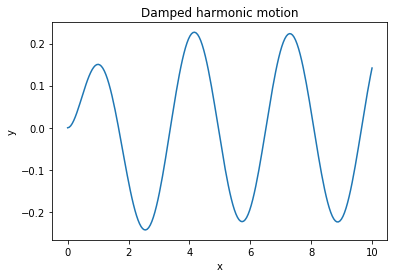

In [9]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped harmonic motion")
plt.plot(x, y)

In [10]:
@misc{sheffield,
    author    = "Sam Dolan",
    title     = "Example: Solving Ordinary Differential Equations",
    url       = "http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html"
}

Overwriting bibliography.bib
